In [6]:
from nilearn import datasets
import sys 
import numpy as np
import nibabel as nib
from nilearn.input_data import NiftiMasker, MultiNiftiMasker, NiftiLabelsMasker, NiftiMapsMasker
from scipy import stats
import os
import pandas as pd
from nilearn import plotting
import matplotlib.pyplot as plt 
from nilearn import input_data
from nilearn.connectome import ConnectivityMeasure
import shutil
import glob
%autosave 5

Autosaving every 5 seconds


**PLOT FUNCTIONAL CONNECTIVITY USING THE SCHAEFER_2018 ATLAS**

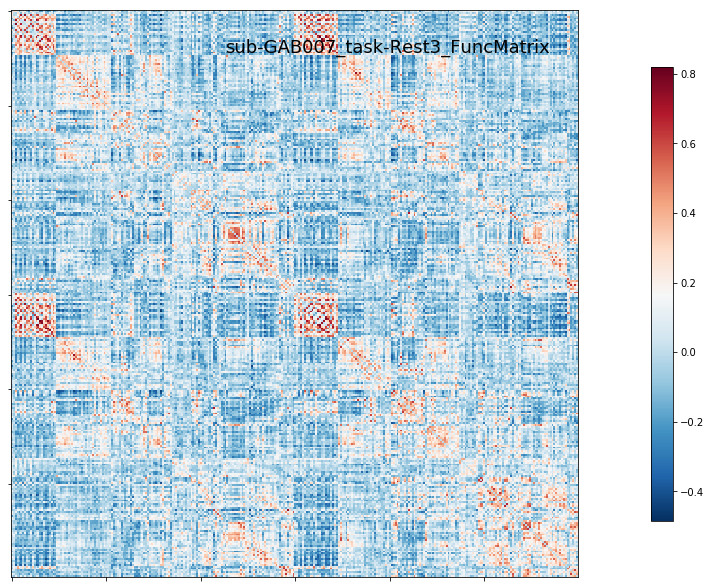

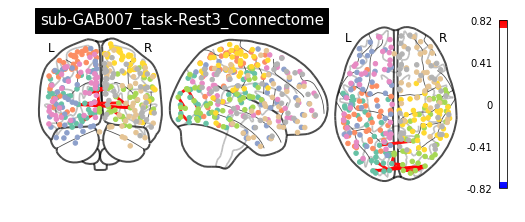

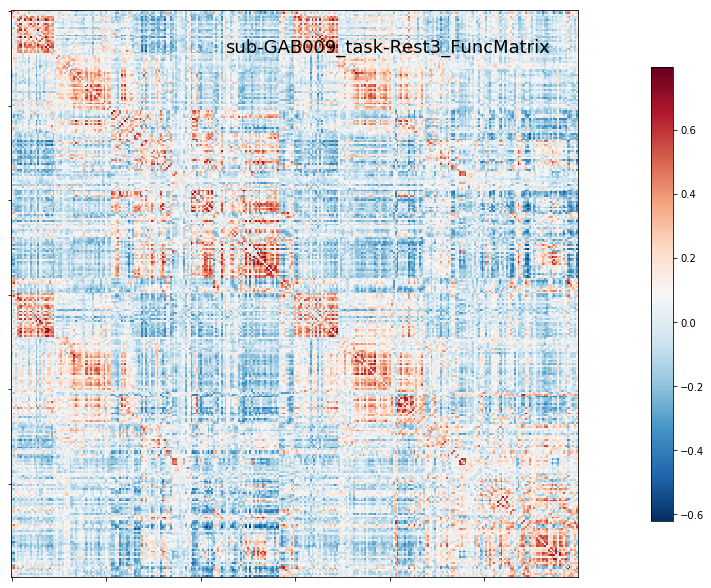

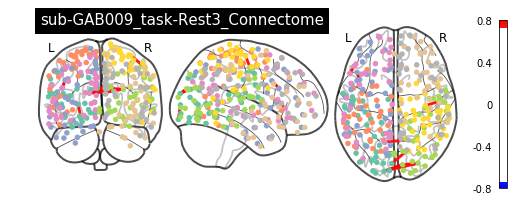

In [7]:
#Step 1: Load functional dataset.
data_folder = ('/home/ttha0011/kg98/Thapa/DiCER/1_ParametersProject/3_DiCERParamsTests/1_CompareWhenToDenoise/3_DBScan_Output/')

dataset = datasets.fetch_atlas_schaefer_2018(n_rois=300,
                                             yeo_networks=7)
atlas_filename = dataset.maps
labels = dataset.labels

#shutil.move("/home/ttha0011/nilearn_data/", data_folder + 'ScriptsUsed')

#Step 2: Enter subject ID.
subID = ['sub-GAB007', 'sub-GAB009']

for subID in subID:

    #Step 3: Define condition.
    Condition = ['Rest3']
    
    for cond in Condition:

        #Step 4: Define the full path to where the func images are located.
        DataFolder = os.path.join(data_folder, subID, '{}_{}_dicer_lite0.2'. format (subID, cond))
        #print (FullPath)

        #Step 5: Change directory to subject's func folder defined in Step 3.
        os.chdir(DataFolder)
        
        #Step 6: Print new working directory. Make sure this path points to where your folders are located.
        os.getcwd()

        #Step 7: List contents present in the current working directory defined in Step 3, and 4.
        os.listdir()

        #Step 8: Define nii.gz file
        FuncFile = ('{}_task-{}_space-MNI152NLin2009cAsym_desc-preproc_bold_dbscan.nii.gz'.format(subID, cond))
        #print(Dataset)
        
        #Step 8: Define nii.gz file
        #RegressorsFile = ('{}_task-{}_WMCSFGSR.txt'.format(subID, cond))
        #print(Dataset)

        #Step 9: Define prefrontal cortex co-ordinates.
        #PFC_coords = [(-38, 30, 30)]                                                
        
        #Step 10: Atlas masker.        
        masker = NiftiLabelsMasker(labels_img=atlas_filename, 
                                   standardize=True)
        
        #Step 11: Fit atlas maker to func data,nd extract the timeseries.
        Atlas_TimeSeries = masker.fit_transform(FuncFile)
        
        #Step 13: Save atlas masker applied  time series as a text file.
        np.savetxt('{}_task-{}_Schaefer2018_ts.txt'.format(subID, cond), Atlas_TimeSeries)
        
        #Step 14: Compute and display correlation matrix.
        correlation_measure = ConnectivityMeasure(kind='correlation')
        correlation_matrix = correlation_measure.fit_transform([Atlas_TimeSeries])[0]

        #Step 15: Plot the correlation matrix. Mask the main diagonal for visualization:
        np.fill_diagonal(correlation_matrix, 0)
        
        #Step 14: Create matrix ordered for block-like representation.
        plotting.plot_matrix(correlation_matrix, 
                             figure=(10, 8), 
                             title=('{}_task-{}_FuncMatrix'.format(subID, cond)))

        
        plt.savefig('{}_task-{}_FuncMatrix_Schaefer2018.png'.format(subID, cond))
        
        #Step 15: grab center coordinates for atlas labels
        coordinates = plotting.find_parcellation_cut_coords(labels_img=atlas_filename)
        #print(coordinates)
        
        coords=coordinates
        
        plotting.plot_connectome(correlation_matrix, 
                                 coords,
                                 title=('{}_task-{}_Connectome'.format(subID, cond)),
                                 edge_threshold='99.98%', 
                                 node_size=20, 
                                 colorbar=True)
        
        plt.savefig('{}_task-{}_Connectome_Schaefer2018.png'.format(subID, cond))


        #Step 23: Move files
        source_folder = DataFolder
        destination_folder = os.path.join(data_folder, subID, 'FunctionalConnectivity')
        files = glob.glob('{}_task-{}_Schaefer2018_ts.txt'.format(subID, cond))
        
        for f in files:
            src = source_folder
            dst = destination_folder
            shutil.move(f,dst)
            
         
        #Step 23: Move files
        source_folder = DataFolder
        destination_folder = os.path.join(data_folder, subID, 'FunctionalConnectivity')
        files = glob.glob('{}_task-{}_FuncMatrix_Schaefer2018.png'.format(subID, cond))
        
        for f in files:
            src = source_folder
            dst = destination_folder
            shutil.move(f,dst)
            
        
        #Step 23: Move files
        source_folder = DataFolder
        destination_folder = os.path.join(data_folder, subID, 'FunctionalConnectivity')
        files = glob.glob('{}_task-{}_Connectome_Schaefer2018.png'.format(subID, cond))
        
        for f in files:
            src = source_folder
            dst = destination_folder
            shutil.move(f,dst)
        